$L = (y-(1/(log(x*a)+b)))^2$

In [1]:
import torch


In [20]:
a = torch.tensor(0.5, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
x = 5
y = 2


In [21]:
u = x * a
v = torch.log(u)
w = v + b
t = 1 / w
z = y - t
L = z ** 2

In [71]:
%matplotlib inline
from graphviz import Digraph
from torch.autograd import Variable


def make_dot(var):
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def add_nodes(var):
        if var not in seen:
            if isinstance(var, Variable):
                value = '('+(', ').join(['%d'% v for v in var.size()])+')'
                dot.node(str(id(var)), str(value), fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'next_functions'):
                for u in var.next_functions:
                    dot.edge(str(id(u[0])), str(id(var)))
                    add_nodes(u[0])
    add_nodes(var)
    return dot


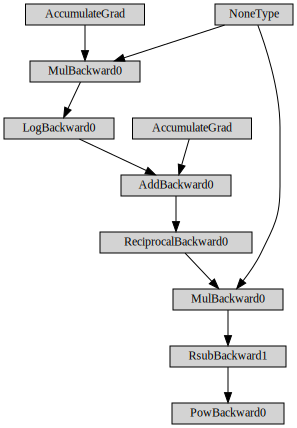

In [72]:
make_dot(L.grad_fn)

In [69]:
L.grad_fn.next_functions[0][0].next_functions

((<MulBackward0 at 0x7f9c5b4c9900>, 0),)